<h1>Linear Regression in Python</h1>

For those that don't understand it - regression seems like a scary word - but the idea is very simple. You are basically trying to predict a value based on another value - so if I weighed 10 stone - what would be my probable height be based on the data set that I am comparing against? 
<br><br> This can be done by trying to fit a straight line to a set of data points and then use this line to predict unobserved values.



So for this we will use Numpy to create a dummy data set based on height and weight....<br><br>For this we will use inches for height and pounds for weight as feet and stone might get a bit tricky...<br><br>So we need to create dummy data for weight and height 

In [2]:
%matplotlib inline
import numpy as np
from pylab import *
import seaborn as sns; sns.set(color_codes=True)
import pandas as pd

Height = np.random.normal(65.0,3, 1000)
#Average 65 inches tall, Standard deviation of 10 inches away from the average and 1000 random data points.

Weight = (Height + np.random.normal(9, 3.7, 1000)) *1.8




Now create a Pandas dataframe with this data

In [3]:
body_stats = pd.DataFrame(Height,Weight)

Now we create a seaborn regplot that will show the relationship between height and weight

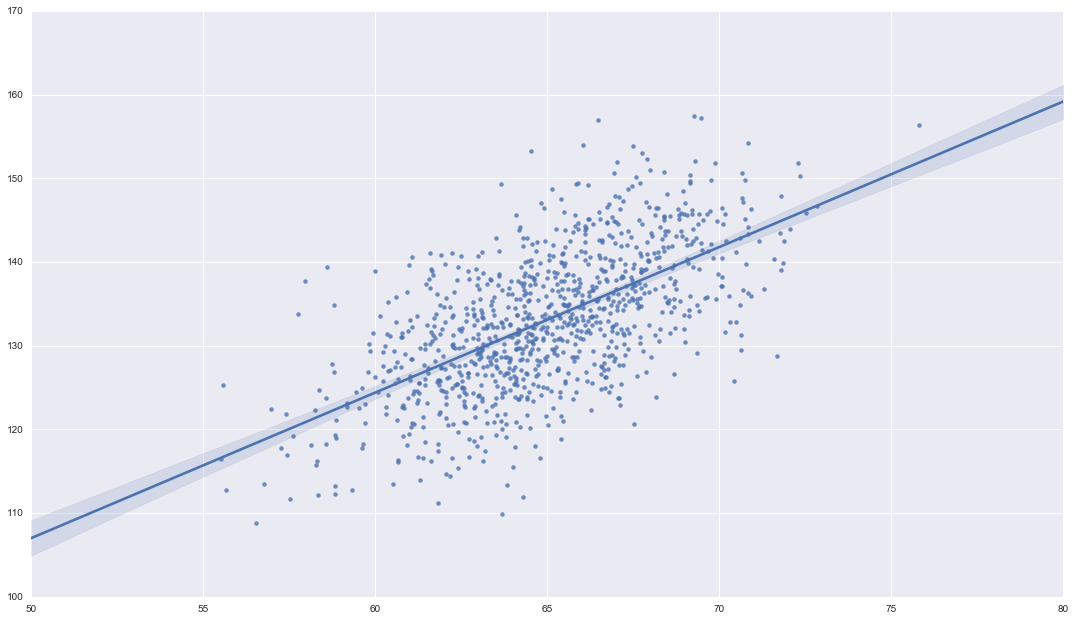

In [4]:
ax = sns.regplot(x=Height, y=Weight, data=body_stats,label='label')
ax.figure.set_size_inches(18.5, 10.5)

As we only have 2 features (height and weight), we can keep it simple and just use scipy.state.linregress to predict some values
<br> 

In [5]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(Height, Weight)
print "Slope: " ,slope
print "Intercept: ", intercept
print "R_value: ",  r_value 
print "P_Value: ", p_value
print "Standard Error " ,std_err

Slope:  1.73929545935
Intercept:  20.0380502399
R_value:  0.619290282895
P_Value:  6.01303167041e-107
Standard Error  0.0698028512366


Looking at the above values - what do they mean?<br>
- The slope is the correlation between the two values
- The intercept is the mean of the Y (weight) axis minus the slope times the mean of the X (height) axis
- R Value is the r sqaures value - a zero is bad none of the variance is captured, 1 is good all of the variance is captured.
- Standard error is the average distance between each point and the regression line

<b>But How do i actually predict a value - for example if have a height of 70 inches - what is my probale weight?</b>

For this we can create a little function that allows us to predict a height value based on the weight value.

In [6]:
height = 70
def predict(x):
    return slope * x + intercept

result = predict(height)
print "If you are " , height , " inches tall you should probably weight " , result ," pounds"

If you are  70  inches tall you should probably weight  141.788732394  pounds
